# TS8: Filtrado No Lineal

## Consignas

En la **TS7** se experimentaron t√©cnicas de **filtrado lineal** para la mitigaci√≥n de interferencias en la se√±al electrocardiogr√°fica (ECG).  
Tal vez la interferencia que m√°s exigi√≥ el dise√±o de los filtros digitales ha sido el **movimiento de l√≠nea de base del ECG**.  
La misma se trata de oscilaciones de muy baja frecuencia (< 0.5 Hz) y en ocasiones de alta energ√≠a.

En esta tarea semanal se analizar√°n **t√©cnicas no lineales de estimaci√≥n/substracci√≥n** de la se√±al de movimiento de base $b(n)$:

$$
\hat{x} = s - \hat{b}
$$

Siendo:
- $s$: la se√±al de ECG registrada con interferencias.  
- $\hat{x}$: la se√±al filtrada, una estimaci√≥n del ECG sin interferencias.  

Se pide que implemente ambas estimaciones de $b$ detalladas a continuaci√≥n:

---

### 1) Filtro de mediana

Se estima $\hat{b}$ a partir de la siguiente expresi√≥n:

$$
\hat{b} = \text{med}_{600}(\text{med}_{200}(s))
$$

siendo $\text{med}_t(s)$ el operador de mediana de $t$ milisegundos aplicado sobre la se√±al $s$, es decir:

$$
\hat{b}[n] = \text{med}(m[n], m[n-1], \dots, m[n-600 \cdot f_s])
$$

donde:

$$
m[n] = \text{med}(s[n], s[n-1], \dots, s[n-200 \cdot f_s])
$$

> üí° **Ayuda**: Puede utilizar la implementaci√≥n del filtro de mediana provista en `scipy.signal`.

---

### 2) Interpolaci√≥n mediante splines c√∫bicos

A partir de las detecciones provistas en `ecg.mat` (campo `qrs_detections`), puede estimar el **nivel isoel√©ctrico**,  
es decir, el momento donde la actividad el√©ctrica card√≠aca es aproximadamente nula.  

El intervalo entre la onda **P** y **Q** es el momento m√°s adecuado para estimar las caracter√≠sticas de la interferencia que origina el movimiento de la l√≠nea de base.  
En ese momento el impulso card√≠aco es demorado al atravesar el **n√≥dulo aur√≠culo-ventricular**.

Para la localizaci√≥n del segmento PQ, puede valerse de la localizaci√≥n de cada latido (l√≠neas rojas verticales $n_i$)  
y, a partir de la misma, anticipar un tiempo adecuado $n_0$ de manera tal de no incluir la onda P ni Q.  

Esto resultar√° en un conjunto de valores:

$$
S = \{(m_i, s(m_i)) \,|\, i = 1, 2, \dots, Q \}
$$

donde $m_i = n_i - n_0$ y $Q$ es la cantidad de latidos en el registro (1903).

> ‚ö†Ô∏è Recuerde que la se√±al de l√≠nea de base debe estar muestreada a la misma frecuencia que el ECG, por lo que deber√≠a remuestrear dicha se√±al.  
Puede usar la funci√≥n de interpolaci√≥n spline para ello.

La l√≠nea de base estimada ser√°:

$$
\hat{b}(n) = \text{spline}_3(S, n) \quad \text{para} \quad n = 1, 2, \dots, N
$$

donde la funci√≥n `spline3` ser√° la responsable de realizar la interpolaci√≥n para las $N$ muestras de la se√±al $s$.

---

### 3) Filtro adaptado (Matched Filter)

Aplique el concepto de **filtro adaptado** para dise√±ar un detector de latidos.  
Utilice el patr√≥n provisto en el campo `qrs_pattern1`.

> üìö **Ayuda**: Revise el concepto de filtro adaptado en Wikipedia o la bibliograf√≠a de la materia (Porat, secci√≥n 14.4.9).

#### a) Pregunta te√≥rica

Explique conceptualmente c√≥mo podr√≠a realizar un detector de latidos con la se√±al resultante del filtro adaptado.  
Discuta la utilidad y limitaciones de este m√©todo.

#### b) Implementaci√≥n pr√°ctica

Realice la detecci√≥n de los latidos, comparando las detecciones obtenidas con las que se incluyen en la variable `qrs_detections`.

Proponga alguna m√©trica (por ejemplo: **sensibilidad**, **valor predictivo positivo**) para cuantificar la performance del detector.


---

## Introduccion

Ahora, siguiendo los conceptos de la TS7 queremos seguir aplicando distintas maneras de filtras la se√±al. Hasta el momento, hemos visto metodos de filtrado lineales que funcionan a partir de ciertos principios o algoritmos para alcanzar este objetivo. Pero, ahora nos queremos adentrar en otra parte mas del filtrado en el cual vamos a ver los filtros no lineales, pero antes vamos a explicar un concepto importante:

### Baseline o linea de base

Antes, asumiamos que el ruido y las se√±ales no se solapaban. Por lo que, estos venian en bandas separadas pero esto no ocurre en la realidad y en una gran cantidad de casos tenemos que la se√±al y el ruido vienen en cierta medida solapadas unas con otras. Con esto en mente, vamos a pensar a la se√±al de otra manera:

$$
\hat{x} = s - \hat{b}
$$

Siendo:
- $s$: la se√±al registrada con interferencias.  
- $\hat{x}$: la se√±al filtrada, una estimaci√≥n del ECG sin interferencias.
- $\hat{b}$: el ruido que se le a√±ade a la se√±al. Tambien conocido como baseline.

Con este concepto, pensamos que la se√±al original va a ser la que registramos menos el ruido que llamamos baseline. A partir de esto es que surje el concepto de estos filtos no lineales. 

---
---

### Filtro de Mediana

Vamos a utilizar el c√°lculo de la **mediana** sobre la se√±al. Recordemos que la mediana de una secuencia se define de la siguiente forma:

- Si $N$ es impar:

$$
\text{med}(x_1, x_2, \dots, x_N) = x_{\left(\frac{N+1}{2}\right)}^{\uparrow}
$$

- Si $N$ es par:

$$
\text{med}(x_1, x_2, \dots, x_N) = \frac{1}{2} \left( x_{\left(\frac{N}{2}\right)}^{\uparrow} + x_{\left(\frac{N}{2} + 1\right)}^{\uparrow} \right)
$$

donde $x_i^{\uparrow}$ indica el elemento $i$-√©simo en la secuencia **ordenada de menor a mayor**.

---

#### ¬øCu√°l es la ventaja de usar la mediana?

A diferencia del promedio, la mediana **es robusta frente a valores at√≠picos** (outliers).  
Esto significa que si existe un pico abrupto en la se√±al, el resultado de la mediana no se ve fuertemente afectado, mientras que el promedio s√≠ puede verse alterado significativamente.  
De esta manera, el uso de la mediana permite una estimaci√≥n m√°s estable del nivel de base en presencia de artefactos o interferencias breves.

---

#### Aplicaci√≥n al ECG

Con esta propiedad en mente, vamos a calcular la mediana sobre la se√±al ECG utilizando **ventanas** de tama√±o adecuado.

En el caso del ECG, se recomienda aplicar **dos pasadas del filtro de mediana**:

1. **Primera pasada (ventana peque√±a):** elimina ruidos de **alta frecuencia**.
2. **Segunda pasada (ventana grande):** elimina oscilaciones de **baja frecuencia** como el movimiento de l√≠nea de base.

Esta t√©cnica permite conservar la morfolog√≠a del ECG y mejorar la estimaci√≥n del componente √∫til.

---
---

### Filtro de splines cubicos

Otra opci√≥n para estimar la l√≠nea de base (**baseline**) es utilizar **interpolaci√≥n mediante splines c√∫bicos**.

Para aplicar esta t√©cnica, primero necesitamos identificar **puntos en la se√±al donde la actividad el√©ctrica sea m√≠nima**, es decir, donde la se√±al ECG se aproxime al valor real de la l√≠nea de base. Estos puntos nos permitir√°n construir una estimaci√≥n de la l√≠nea de base $b(n)$.

---

#### ¬øC√≥mo seleccionamos estos puntos?

En el caso del ECG, podemos utilizar las posiciones de los **complejos QRS** (picos de la se√±al) y retroceder algunas muestras hacia atr√°s. En esa regi√≥n, ubicada entre la onda **P** y la onda **Q**, la actividad el√©ctrica es baja, ya que representa el **intervalo PQ**, donde el impulso card√≠aco es demorado al atravesar el nodo aur√≠culo-ventricular.

Para mejorar la estimaci√≥n y reducir el impacto del ruido:

- En lugar de tomar un √∫nico punto por latido, se promedia una **ventana de muestras** (por ejemplo, 20 muestras).
- Esto ayuda a **reducir el ruido de l√≠nea (50 Hz)** si el tama√±o de la ventana es m√∫ltiplo del per√≠odo de esa frecuencia (20 ms para 50 Hz).
- Adem√°s, el promedio en ventana tambi√©n mitiga la influencia de artefactos o picos an√≥malos.

As√≠, obtenemos un conjunto de puntos $\{(t_i, b_i)\}$ que representan estimaciones locales de la l√≠nea de base, y que luego se pueden interpolar.

---

### ¬øC√≥mo funciona la interpolaci√≥n con Splines C√∫bicos?

La **interpolaci√≥n con splines c√∫bicos** construye una curva suave que **pasa por todos los puntos** dados. El dominio se divide en tramos, y en cada tramo se ajusta un **polinomio de grado 3** (c√∫bico). Estos polinomios cumplen ciertas condiciones de continuidad:

- La curva es **continua**.
- Su primera y segunda derivada tambi√©n son continuas en los puntos de uni√≥n (nodos).
- Los polinomios se ajustan de forma que la curva sea **suave** y no presente cambios bruscos.

En t√©rminos simples:

> La spline c√∫bica genera una curva que "pasa por los puntos" de manera suave, sin saltos ni √°ngulos marcados.

---

Una vez construida la spline con los puntos $\{(t_i, b_i)\}$, evaluamos esa funci√≥n para todos los tiempos $t$ de la se√±al ECG. Esto nos da una **estimaci√≥n completa de la l√≠nea de base**, que luego se puede restar de la se√±al original para obtener una versi√≥n "limpia" del ECG:

$$
x(n) = s(n) - \hat{b}(n)
$$

donde $s(n)$ es la se√±al original y $\hat{b}(n)$ la l√≠nea de base estimada por interpolaci√≥n spline.

---
---

### Filtro Adaptado (Matched Filter)

En este √∫ltimo filtro vamos a utilizar un concepto distinto a los anteriores: el **filtro adaptado** o *matched filter*.  
El objetivo es detectar un patr√≥n espec√≠fico dentro de una se√±al, y en nuestro caso ese patr√≥n es **un latido t√≠pico del ECG**.

Para realizar esta detecci√≥n, nos vamos a basar en el principio de la **correlaci√≥n cruzada**. Es decir:

> Vamos a correlacionar la se√±al con el patr√≥n, y observar en qu√© puntos la correlaci√≥n es m√°xima.  
> Los picos en esta correlaci√≥n indicar√°n la presencia de un latido similar al patr√≥n.

Esto se puede interpretar tambi√©n como una forma de **autocorrelaci√≥n**, ya que estamos comparando la se√±al consigo misma (a trav√©s de un patr√≥n extra√≠do de ella).  
En definitiva, los **picos de correlaci√≥n** se√±alan los instantes donde es m√°s probable que haya un latido.

Implementaremos esto a continuaci√≥n, y luego analizaremos con m√°s detalle c√≥mo interpretar la se√±al de salida del filtro adaptado.

---
---

Finalmente, comencemos con la implementacion de los primeros 2 filtos:


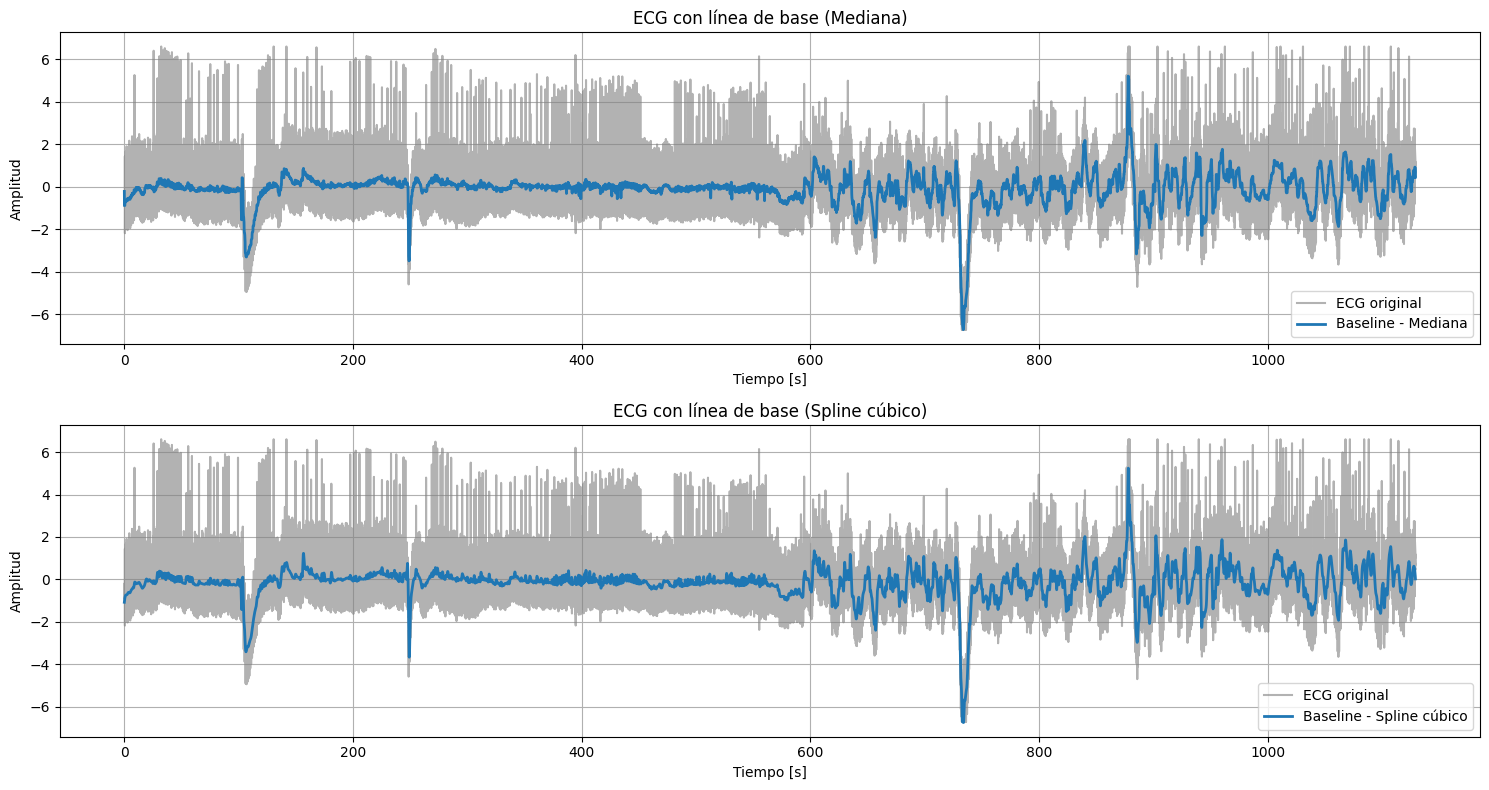

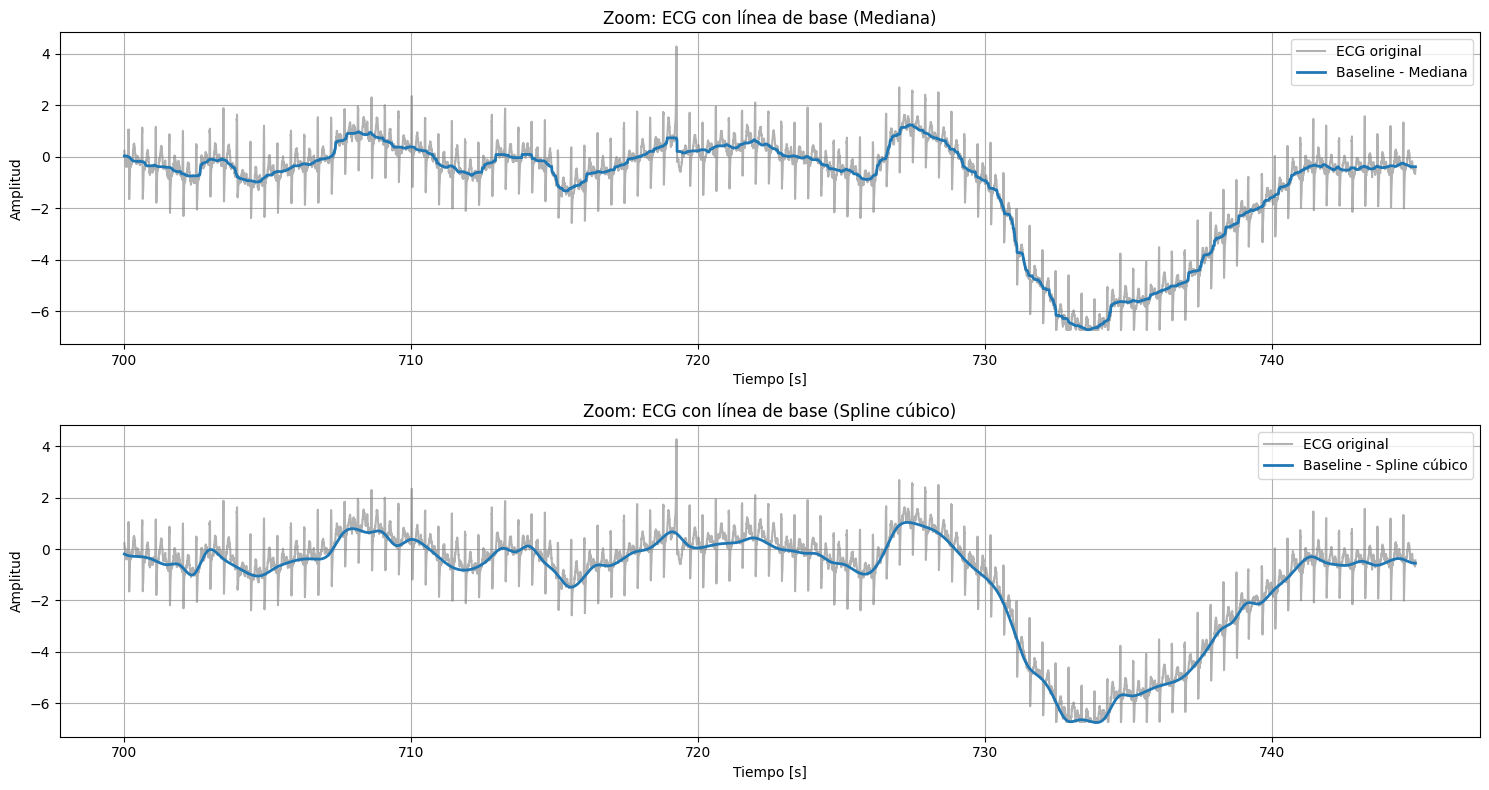

In [2]:
#%% Importado de m√≥dulos
import numpy as np
from scipy import signal as sig
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy.signal import medfilt
from scipy.interpolate import CubicSpline

#%% Funci√≥n auxiliar
def vertical_flaten(a):
    return a.reshape(a.shape[0],1)

#%% Carga y preprocesamiento del ECG
fs_ecg = 1000  # Hz

# Carga de la se√±al ECG
mat_struct = sio.loadmat('./ecg.mat')  # Usamos el mismo archivo para ambos m√©todos
ecg_one_lead = np.squeeze(mat_struct['ecg_lead']).astype(float)

# Normalizaci√≥n
ecg_one_lead = (ecg_one_lead - np.mean(ecg_one_lead)) / np.std(ecg_one_lead)

# Tiempo total
t_ecg = np.arange(len(ecg_one_lead)) / fs_ecg

#%% --- Filtro de mediana (Baseline por mediana) ---
win1_samples = 200
win2_samples = 600

# Asegurar que sean impares
if win1_samples % 2 == 0:
    win1_samples += 1
if win2_samples % 2 == 0:
    win2_samples += 1

# Aplicaci√≥n de los filtros
ecg_med1 = medfilt(ecg_one_lead, kernel_size=win1_samples)
baseline_median = medfilt(ecg_med1, kernel_size=win2_samples)

#%% --- Filtro por splines c√∫bicos (Baseline por spline) ---
qrs_detections = np.squeeze(mat_struct['qrs_detections']).astype(int)

# Punto de inter√©s: 90 muestras antes del QRS
Point_of_Interest = qrs_detections - 90
Point_of_Interest = Point_of_Interest[(Point_of_Interest >= 0) & (Point_of_Interest + 20 < len(ecg_one_lead))]

# C√°lculo del promedio en una ventana de 20 muestras
t_prom = []
val_prom = []

for idx in Point_of_Interest:
    window = ecg_one_lead[idx : idx + 20]
    prom = np.mean(window)
    t_prom.append(idx / fs_ecg)
    val_prom.append(prom)

t_prom = np.array(t_prom)
val_prom = np.array(val_prom)

# Spline c√∫bico
cs = CubicSpline(t_prom, val_prom)
baseline_spline = cs(t_ecg)


#%% --- Gr√°fico 1: Se√±al completa con sus dos baselines ---
plt.figure(figsize=(15, 8))

# Subplot 1: Baseline por mediana
plt.subplot(2, 1, 1)
plt.plot(t_ecg, ecg_one_lead, label='ECG original', color='gray', alpha=0.6)
plt.plot(t_ecg, baseline_median, label='Baseline - Mediana', linewidth=2)
plt.title('ECG con l√≠nea de base (Mediana)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)

# Subplot 2: Baseline por spline c√∫bico
plt.subplot(2, 1, 2)
plt.plot(t_ecg, ecg_one_lead, label='ECG original', color='gray', alpha=0.6)
plt.plot(t_ecg, baseline_spline, label='Baseline - Spline c√∫bico', linewidth=2)
plt.title('ECG con l√≠nea de base (Spline c√∫bico)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

#%% --- Gr√°fico 2: Zoom en muestras 700.000 a 745.000 ---
start = 700000
end = 745000
t_zoom = t_ecg[start:end]
ecg_zoom = ecg_one_lead[start:end]
baseline_median_zoom = baseline_median[start:end]
baseline_spline_zoom = baseline_spline[start:end]

plt.figure(figsize=(15, 8))

# Subplot 1: Baseline por mediana (zoom)
plt.subplot(2, 1, 1)
plt.plot(t_zoom, ecg_zoom, label='ECG original', color='gray', alpha=0.6)
plt.plot(t_zoom, baseline_median_zoom, label='Baseline - Mediana', linewidth=2)
plt.title('Zoom: ECG con l√≠nea de base (Mediana)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)

# Subplot 2: Baseline por spline c√∫bico (zoom)
plt.subplot(2, 1, 2)
plt.plot(t_zoom, ecg_zoom, label='ECG original', color='gray', alpha=0.6)
plt.plot(t_zoom, baseline_spline_zoom, label='Baseline - Spline c√∫bico', linewidth=2)
plt.title('Zoom: ECG con l√≠nea de base (Spline c√∫bico)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### An√°lisis de los Resultados

En este an√°lisis utilizamos los m√©todos de **mediana** y de **splines c√∫bicos** para estimar la l√≠nea de base (baseline) de la se√±al ECG.  
Como se observa, ambos m√©todos proporcionan una estimaci√≥n adecuada de dicha l√≠nea de base.  
Al restarla de la se√±al original, logramos **filtrar** el ECG eliminando esa componente lenta que enmascara el contenido √∫til de la se√±al (ruido de baja frecuencia).

Al hacer un **zoom** en una regi√≥n con alto contenido de ruido, se aprecia que incluso ante grandes oscilaciones, ambos m√©todos estiman correctamente la l√≠nea de base.  
Particularmente, en la zona cercana a los **719 segundos**, donde se presenta un **latido ect√≥pico** (que puede parecerse a una delta), se puede ver una mejora notable:  
en m√©todos cl√°sicos de filtrado lineal, este tipo de evento genera una **respuesta al impulso** que deforma la morfolog√≠a de la se√±al.  
Sin embargo, con estos **m√©todos no lineales**, ese fen√≥meno no ocurre, preservando la forma del ECG tras eventos abruptos.

Finalmente, en cuanto a la implementaci√≥n:

- El m√©todo con **filtro de mediana** resulta mucho m√°s **directo y sencillo** de aplicar.
- Por el contrario, el uso de **splines c√∫bicos** requiere una identificaci√≥n previa de una zona estable de la se√±al (cercana al segmento PQ), donde se pueda asumir que la l√≠nea de base predomina, y as√≠ obtener puntos v√°lidos para la interpolaci√≥n.

En resumen, ambos m√©todos son eficaces, pero el filtro de mediana ofrece ventajas pr√°cticas en t√©rminos de simplicidad de implementaci√≥n.

---

Vamos con el Match Filter:


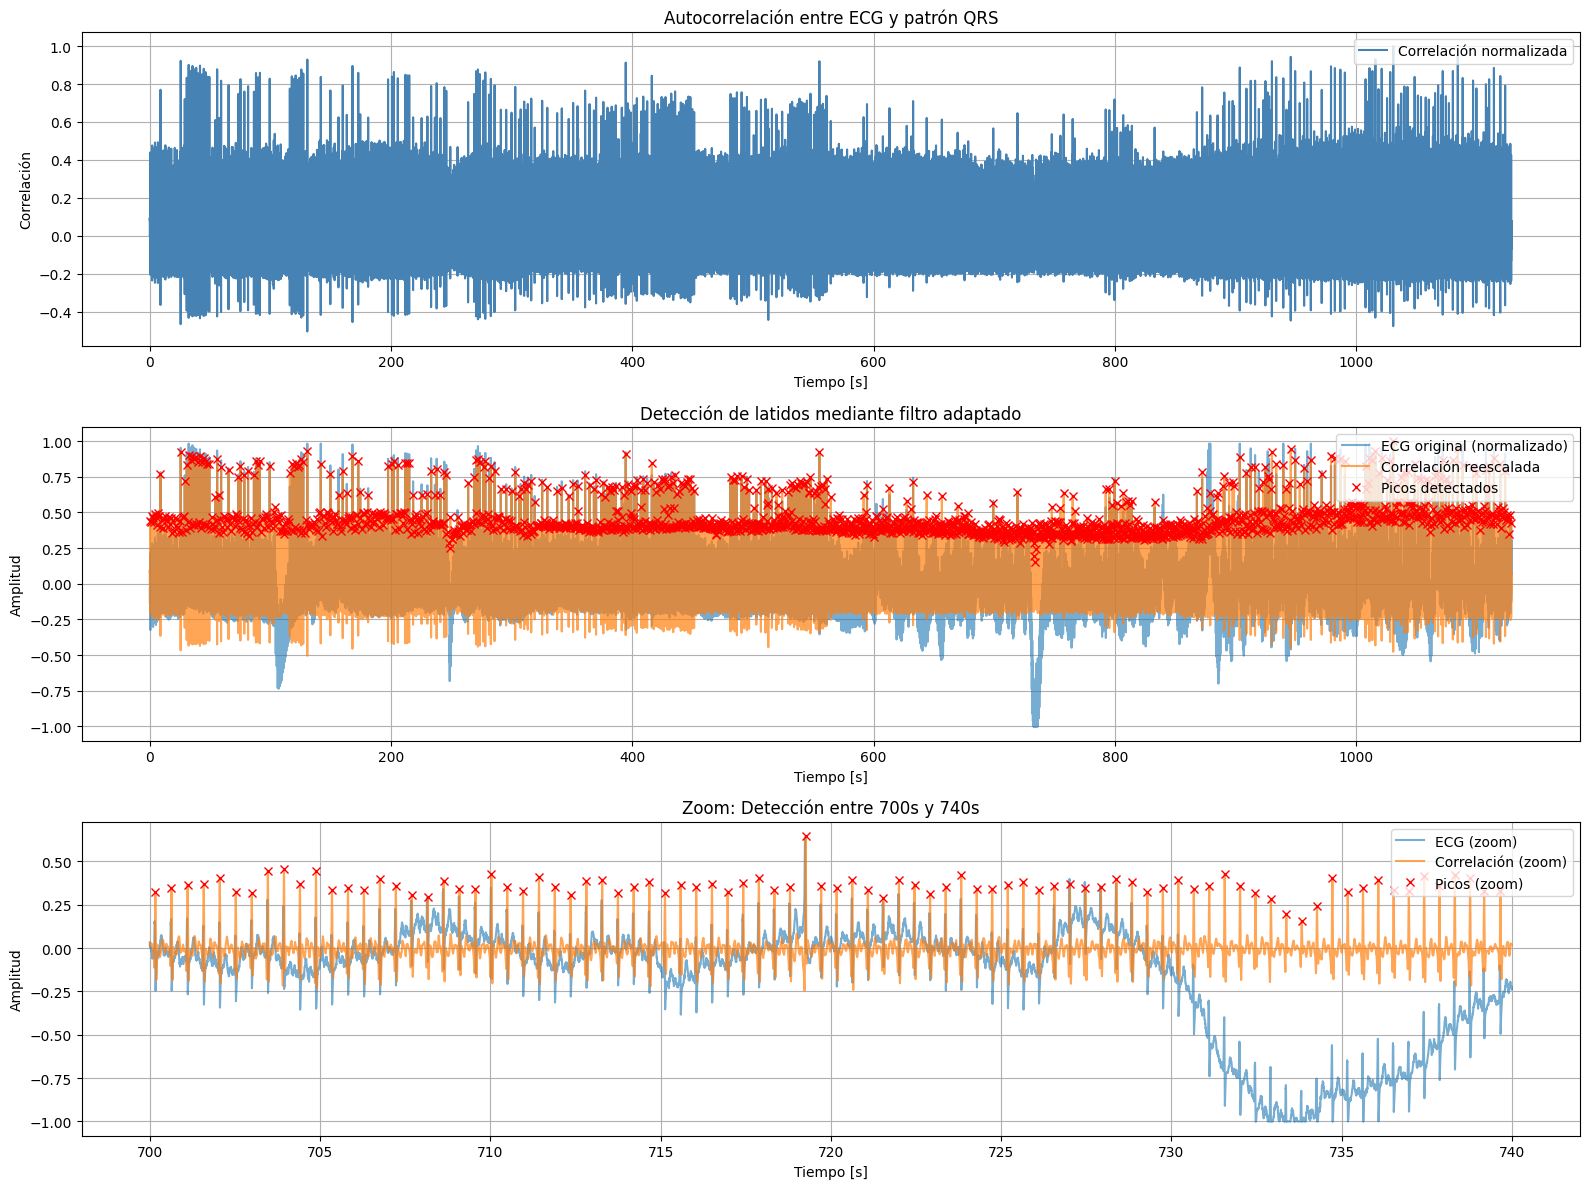

In [6]:
#%% Importaci√≥n de m√≥dulos
import numpy as np
from scipy import signal as sig
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy.signal import find_peaks

#%% Lectura de datos
fs_ecg = 1000  # Hz
mat_struct = sio.loadmat('./ecg.mat')

# Se√±al original y patr√≥n
ecg_one_lead = np.squeeze(mat_struct['ecg_lead']).astype(float)
qrs_pattern = np.squeeze(mat_struct['qrs_pattern1']).astype(float)

# Tiempo
t_ecg = np.arange(len(ecg_one_lead)) / fs_ecg

#%% Normalizaci√≥n
ecg_norm = (ecg_one_lead - np.mean(ecg_one_lead)) / np.std(ecg_one_lead)
qrs_pattern_norm = (qrs_pattern - np.mean(qrs_pattern)) / np.std(qrs_pattern)

#%% Correlaci√≥n cruzada normalizada
corr_norm = sig.correlate(ecg_norm, qrs_pattern_norm, mode='same')

# Reescalado para comparaci√≥n
ecg_rescaled = ecg_norm / np.max(np.abs(ecg_norm))
corr_rescaled = corr_norm / np.max(np.abs(corr_norm))

#%% Detecci√≥n de picos
threshold = 0.15  # Ajustado tras inspecci√≥n visual
peaks, _ = find_peaks(corr_rescaled, height=threshold, distance=200)

#%% Gr√°ficos - Subplot 3x1
plt.figure(figsize=(16, 12))

# Subplot 1: Autocorrelaci√≥n completa
plt.subplot(3, 1, 1)
plt.plot(t_ecg, corr_rescaled, color='steelblue', label='Correlaci√≥n normalizada')
plt.title('Autocorrelaci√≥n entre ECG y patr√≥n QRS')
plt.xlabel('Tiempo [s]')
plt.ylabel('Correlaci√≥n')
plt.grid(True)
plt.legend(loc='upper right')

# Subplot 2: Se√±al + correlaci√≥n + picos
plt.subplot(3, 1, 2)
plt.plot(t_ecg, ecg_rescaled, label='ECG original (normalizado)', alpha=0.6)
plt.plot(t_ecg, corr_rescaled, label='Correlaci√≥n reescalada', alpha=0.7)
plt.plot(t_ecg[peaks], corr_rescaled[peaks], 'rx', label='Picos detectados')
plt.title('Detecci√≥n de latidos mediante filtro adaptado')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend(loc='upper right')

# Subplot 3: Zoom en la zona de 700s a 740s
plt.subplot(3, 1, 3)
start = 700_000
end = 740_000
plt.plot(t_ecg[start:end], ecg_rescaled[start:end], label='ECG (zoom)', alpha=0.6)
plt.plot(t_ecg[start:end], corr_rescaled[start:end], label='Correlaci√≥n (zoom)', alpha=0.7)
zoom_peaks = peaks[(peaks >= start) & (peaks < end)]
plt.plot(t_ecg[zoom_peaks], corr_rescaled[zoom_peaks], 'rx', label='Picos (zoom)')
plt.title('Zoom: Detecci√≥n entre 700s y 740s')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


### Analisis de lo obtenido

a) Explique conceptualmente c√≥mo podr√≠a realizar un detector de latidos con la se√±al resultante del filtro adaptado. Discuta la utilidad y limitaciones de este m√©todo.

El detector de latidos basado en un **filtro adaptado** (*matched filter*) se fundamenta en una idea simple: si conocemos la forma t√≠pica de un latido, podemos buscar esa forma dentro de la se√±al completa mediante correlaci√≥n.

#### ¬øC√≥mo funciona?

1. **Selecci√≥n de un patr√≥n QRS**  
   Se toma un latido representativo de la se√±al ‚Äîpor ejemplo, un complejo QRS t√≠pico‚Äî para usarlo como *patr√≥n de referencia*.

2. **Correlaci√≥n cruzada**  
   Se calcula la correlaci√≥n entre el patr√≥n y la se√±al completa. Este proceso compara la forma del patr√≥n con todas las partes de la se√±al.  
   - Si una porci√≥n de la se√±al se parece al patr√≥n, el valor de la correlaci√≥n ser√° alto.
   - Si no se parece (por ejemplo, en presencia de ruido o segmentos planos), el valor ser√° bajo.

3. **Detecci√≥n de picos**  
   Los m√°ximos locales de la se√±al de correlaci√≥n indican posibles posiciones de latidos. Esto se debe a que la correlaci√≥n fue m√°xima en esos puntos, es decir, donde la se√±al "se parece" m√°s al patr√≥n.

---

#### ¬øPor qu√© este m√©todo tambi√©n act√∫a como filtro?

El ruido es t√≠picamente **no correlacionado** con el patr√≥n, por lo que la salida del filtro en regiones de ruido tiende a ser baja. Por eso, adem√°s de detectar latidos, el m√©todo act√∫a como una forma de **filtrado no lineal**, atenuando ruido irrelevante.

---

#### Ventajas del m√©todo:

- **Robustez frente al ruido:** filtra autom√°ticamente componentes que no coinciden con el patr√≥n.
- **Reglas de decisi√≥n simples:** basta con detectar picos por encima de un umbral.
- **Implementaci√≥n directa:** s√≥lo se requiere una operaci√≥n de correlaci√≥n.

---

#### Limitaciones:

- **Dependencia del patr√≥n:** si el patr√≥n de QRS no es representativo (por ejemplo, por ruido, morfolog√≠a at√≠pica, o latidos ect√≥picos), la correlaci√≥n puede fallar.
- **Sensibilidad a la variabilidad:** los latidos pueden variar con el tiempo, y el patr√≥n fijo puede no adaptarse bien a todos ellos.
- **Falsos positivos:** estructuras parecidas al patr√≥n, como artefactos o latidos ect√≥picos, tambi√©n generan una alta correlaci√≥n, aunque no sean latidos normales.

---

**En resumen**, este m√©todo es muy √∫til cuando se cuenta con un patr√≥n de latido limpio y representativo. Sin embargo, su desempe√±o se degrada si hay mucha variabilidad en los latidos o si el patr√≥n no est√° bien elegido. Por eso, suele combinarse con otros criterios o m√©todos para mejorar su robustez.

---
---

Veamos algunas metricas para evaluar la potencia de esta detecci√≥n

In [7]:
#%% Evaluaci√≥n: matriz de confusi√≥n con Pandas
import pandas as pd

# Supuesto: anotaciones reales est√°n en 'qrs_detections' (ajusta si es necesario)
print(mat_struct.keys())  # Verifica el nombre real si es necesario
qrs_true = np.squeeze(mat_struct['qrs_detections']).astype(int)  # Ajusta aqu√≠ si cambia el nombre

# Tolerancia de coincidencia: ¬±100 ms en muestras
tolerance_samples = int(0.1 * fs_ecg)

# Inicializar contadores
TP = 0  # Verdaderos positivos
FP = 0  # Falsos positivos
FN = 0  # Falsos negativos

detected_true = np.zeros(len(qrs_true), dtype=bool)

# Comparar cada pico detectado con los QRS reales
for detected_peak in peaks:
    match_found = False
    for i, true_peak in enumerate(qrs_true):
        if not detected_true[i] and abs(detected_peak - true_peak) <= tolerance_samples:
            TP += 1
            detected_true[i] = True
            match_found = True
            break
    if not match_found:
        FP += 1

# Falsos negativos: QRS reales no detectados
FN = np.sum(~detected_true)

# M√©tricas
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1_score = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

# Crear tabla de confusi√≥n con pandas
confusion_data = {
    'Detecci√≥n': ['Positiva', 'Negativa'],
    'QRS Real Positivo': [TP, FN],
    'QRS Real Negativo': [FP, 'N/A'],  # N/A para claridad
}
confusion_df = pd.DataFrame(confusion_data)
confusion_df.set_index('Detecci√≥n', inplace=True)

# Mostrar resultados
print("\n=== Tabla de Confusi√≥n ===")
display(confusion_df)

# M√©tricas adicionales
metrics_df = pd.DataFrame({
    'Precisi√≥n': [precision],
    'Recall (Sensibilidad)': [recall],
    'F1 Score': [f1_score]
})

print("=== M√©tricas de Evaluaci√≥n ===")
display(metrics_df.style.format("{:.2f}"))


dict_keys(['__header__', '__version__', '__globals__', 'ecg_lead', 'qrs_pattern1', 'heartbeat_pattern1', 'heartbeat_pattern2', 'qrs_detections'])

=== Tabla de Confusi√≥n ===


QRS Real Positivo QRS Real Negativo
Detecci√≥n                                     
Positiva                1902                 3
Negativa                   1               N/A

=== M√©tricas de Evaluaci√≥n ===


### Evaluaci√≥n de la detecci√≥n de QRS con tabla de confusi√≥n

Una vez detectados los latidos (QRS) con correlaci√≥n cruzada, evaluamos qu√© tan bien funciona el algoritmo usando una **tabla de confusi√≥n**.

---

#### ¬øQu√© es una tabla de confusi√≥n?

Es una herramienta que compara lo que detecta el algoritmo con la realidad (QRS reales anotados):

|                        | QRS Real (Presente) | QRS No Real (Ausente) |
|------------------------|---------------------|------------------------|
| **Detecci√≥n Positiva** | TP (Correcto)       | FP (Error)            |
| **Detecci√≥n Negativa** | FN (Omisi√≥n)        | N/A                   |

- **TP (Verdaderos Positivos):** Detecciones correctas de latidos reales.
- **FP (Falsos Positivos):** Detecciones donde no hay latido.
- **FN (Falsos Negativos):** Latidos reales que el algoritmo no detect√≥.

> Como no nos interesa detectar "ausencias de QRS", la celda TN (Verdadero Negativo) no aplica y se marca como N/A.

---

#### M√©tricas evaluadas

- **Precisi√≥n:** Proporci√≥n de detecciones que fueron correctas.  
  $$
  \text{Precisi√≥n} = \frac{TP}{TP + FP}
  $$

- **Sensibilidad (Recall):** Proporci√≥n de latidos reales detectados.  
  $$
  \text{Sensibilidad} = \frac{TP}{TP + FN}
  $$

- **F1 Score:** Promedio balanceado entre precisi√≥n y sensibilidad.  
  $$
  F1 = 2 \cdot \frac{\text{Precisi√≥n} \cdot \text{Sensibilidad}}{\text{Precisi√≥n} + \text{Sensibilidad}}
  $$

---

#### ¬øPara qu√© sirve?

Estas m√©tricas permiten saber si:

- El algoritmo **detecta la mayor√≠a de los QRS reales** (alta sensibilidad).
- **No detecta latidos falsos** (alta precisi√≥n).
- Tiene un **buen equilibrio** entre ambos (alto F1 Score).

Esto es fundamental antes de aplicar el detector en contextos reales o cl√≠nicos.

---

#### ¬øComo nos dio el detector?

Habiendo introducido esto, vemos que la performance de nuestras detecciones es practicamente la misma que lo que teniamos en el archivo de referencia. De esta manera podemos asegurar que lo obtenido en el detector de latidos que realizamos est√° funcionando correctamente. 

## Bonus

üíé **¬øPodr√≠a funcionar el detector basado en un filtro adaptado utilizando un latido proveniente de otro registro o paciente?**

No necesariamente. Si bien es posible que el detector funcione, su efectividad depender√° en gran medida de **qu√© tan representativo sea el latido utilizado como plantilla** en relaci√≥n con los latidos reales del paciente que se desea analizar.

Si la plantilla proviene de un latido que se asemeja bastante al promedio morfol√≥gico del nuevo paciente, el detector podr√≠a funcionar con una precisi√≥n aceptable. Sin embargo, en la pr√°ctica, la **morfolog√≠a del ECG var√≠a significativamente entre pacientes**, y tambi√©n puede cambiar dentro de un mismo paciente debido a factores como la postura, el movimiento o condiciones cl√≠nicas.

Por lo tanto, si la plantilla utilizada no refleja bien la forma de los latidos del nuevo registro, el filtro adaptado **perder√° sensibilidad y especificidad**, generando errores en la detecci√≥n de los picos (com√∫nmente los complejos QRS).

En resumen, **la generalizaci√≥n del detector a otros pacientes no est√° garantizada**, y su desempe√±o depender√° de la similitud entre la plantilla utilizada y la se√±al real a analizar.




---
---

# Bonus:

üíé Proponga alguna mejora a los estimadores de la se√±al  b, como por ejemplo usar las t√©cnicas multirate. 


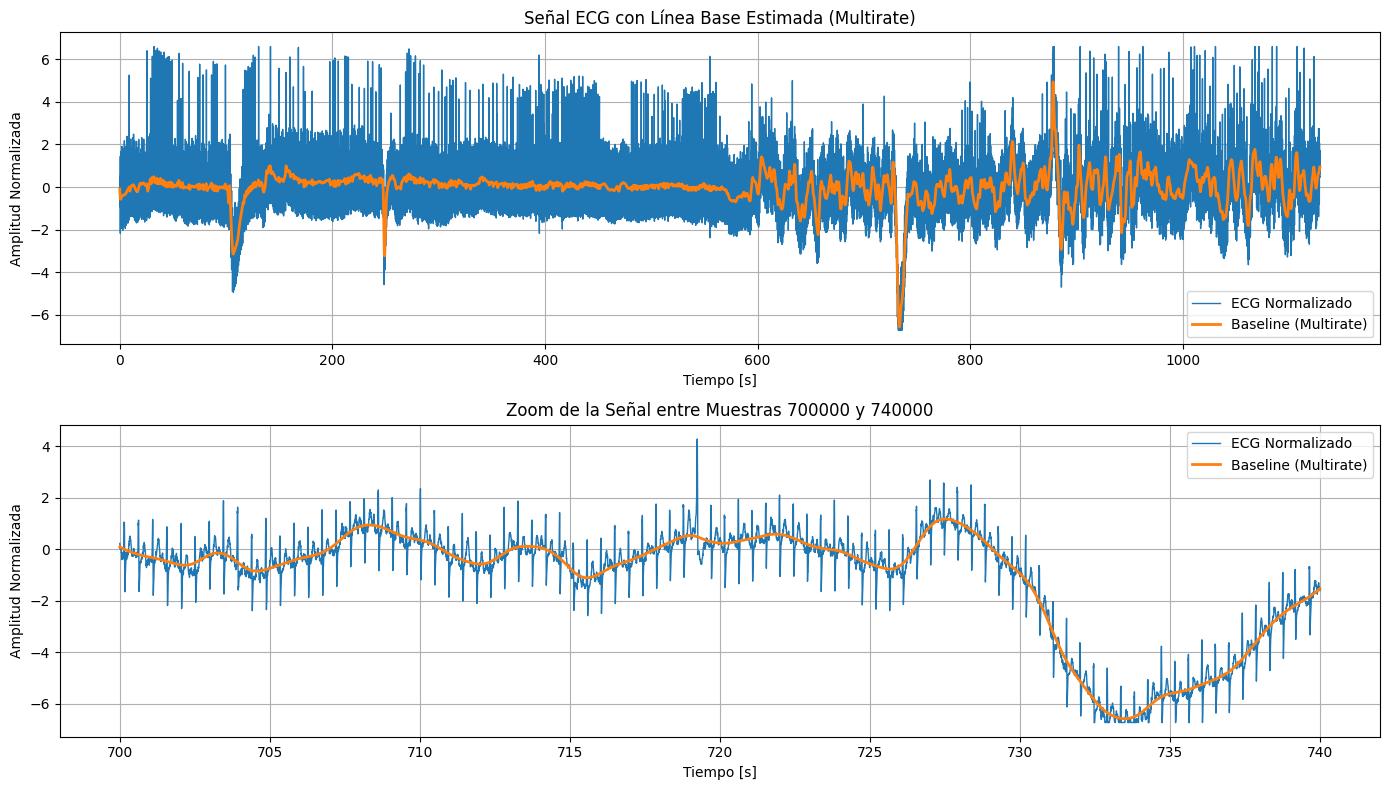

In [13]:
#%% --- Importaci√≥n de m√≥dulos ---
import numpy as np
from scipy import signal as sig
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy.signal import medfilt, decimate
from scipy.interpolate import CubicSpline

#%% --- Carga y preprocesamiento del ECG ---
fs_ecg = 1000  # Hz

# Carga de la se√±al ECG
mat_struct = sio.loadmat('./ecg.mat')  # Aseg√∫rate de tener ecg.mat en el mismo directorio
ecg_one_lead = np.squeeze(mat_struct['ecg_lead']).astype(float)

# Normalizaci√≥n
ecg_one_lead = (ecg_one_lead - np.mean(ecg_one_lead)) / np.std(ecg_one_lead)

# Tiempo total
t_ecg = np.arange(len(ecg_one_lead)) / fs_ecg

#%% --- Estimaci√≥n de l√≠nea base con t√©cnica multirate ---
# Paso 1: Decimaci√≥n
decimation_factor = 10
ecg_decimated = decimate(ecg_one_lead, decimation_factor, ftype='fir', zero_phase=True)

# Paso 2: Filtrado pasa-bajo
cutoff_freq = 0.5  # Hz
fs_decimated = fs_ecg / decimation_factor
nyq = fs_decimated / 2
b, a = sig.butter(2, cutoff_freq / nyq, btype='low')
baseline_low = sig.filtfilt(b, a, ecg_decimated)

# Paso 3: Interpolaci√≥n c√∫bica para volver a la frecuencia original
t_decimated = np.arange(len(baseline_low)) * decimation_factor / fs_ecg
cs = CubicSpline(t_decimated, baseline_low)
baseline_multirate = cs(t_ecg)

#%% --- Gr√°fica con subplot 2x1 ---
plt.figure(figsize=(14, 8))

# Subplot 1: Se√±al completa con baseline
plt.subplot(2, 1, 1)
plt.plot(t_ecg, ecg_one_lead, label='ECG Normalizado', linewidth=1)
plt.plot(t_ecg, baseline_multirate, label='Baseline (Multirate)', linewidth=2)
plt.title('Se√±al ECG con L√≠nea Base Estimada (Multirate)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud Normalizada')
plt.legend()
plt.grid(True)

# Subplot 2: Zoom en muestras 700000 a 740000
start_idx = 700_000
end_idx = 740_000
plt.subplot(2, 1, 2)
plt.plot(t_ecg[start_idx:end_idx], ecg_one_lead[start_idx:end_idx], label='ECG Normalizado', linewidth=1)
plt.plot(t_ecg[start_idx:end_idx], baseline_multirate[start_idx:end_idx], label='Baseline (Multirate)', linewidth=2)
plt.title('Zoom de la Se√±al entre Muestras 700000 y 740000')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud Normalizada')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## Comparemos los metodos

### 1. Filtro de Mediana

Utiliza dos filtros de mediana con ventanas de distinto tama√±o para suavizar progresivamente la se√±al y extraer la l√≠nea base.

**Ventajas:**
- Robusto frente a artefactos puntuales (como espigas).
- No introduce desfase.
- F√°cil de implementar.

**Desventajas:**
- Puede perder oscilaciones fisiol√≥gicas lentas.
- La l√≠nea base no es suave (puede tener quiebres).

---

### 2. T√©cnica Multirate (Decimaci√≥n + Filtro + Interpolaci√≥n)

Basada en el hecho de que la l√≠nea base es una componente de **muy baja frecuencia**. El proceso consiste en:

1. **Decimaci√≥n**: se reduce la tasa de muestreo, eliminando contenido de alta frecuencia.
2. **Filtrado pasa-bajo**: se retienen s√≥lo las variaciones lentas.
3. **Interpolaci√≥n (por splines)**: se recupera la l√≠nea base en la tasa de muestreo original de forma suave.

**Ventajas:**
- Excelente seguimiento de variaciones lentas (como la respiraci√≥n).
- La l√≠nea base resultante es suave y continua.
- Buena separaci√≥n espectral entre se√±al √∫til y l√≠nea base.

**Desventajas:**
- Requiere m√°s procesamiento.
- Puede suavizar en exceso si no se eligen bien los par√°metros.

---

Cada t√©cnica tiene ventajas seg√∫n el tipo de se√±al y el objetivo cl√≠nico. El filtro de mediana es ideal para eliminar artefactos, mientras que la t√©cnica multirate es superior cuando se desea conservar las variaciones fisiol√≥gicas lentas.

